In [1]:
#load all Libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import string as str

In [2]:
#load the dataset and if its distributed then aggregate the files to 1
titanic=pd.read_csv(r'C:\Users\PREETI SARASWAT\Desktop\test\train (1).csv', delimiter=',')

In [3]:
#visualize data
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info() 
#there are total 891 entries. however some of the entries are missing from age,cabin and embarked column
# datatypes seems to be fine right now 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [5]:
#remove missing values.
titanic=titanic.fillna(method='ffill')
titanic=titanic.fillna(method='bfill')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [6]:
#split the cabin column to have just the initial part.
cabin_new=titanic['Cabin'].apply(lambda x: x[0])

In [7]:
#Analyse data again
titanic['Cabin']=cabin_new
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C,S


In [8]:
#analyse uniformity in column names
titanic.columns 

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [9]:
#check duplicate data
#we have one row for each passenger, so check if any passenger name has been listed twice,results show no duplicates
titanic['Name'].value_counts().head()

Graham, Mr. George Edward                              1
Elias, Mr. Tannous                                     1
Madill, Miss. Georgette Alexandra                      1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Beane, Mrs. Edward (Ethel Clarke)                      1
Name: Name, dtype: int64

In [10]:
#show details of passengers that has survived and try to see if there is a pattern in any column
titanic_survived=titanic.loc[titanic['Survived']==1,:]
titanic_survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,E,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,E,C


In [11]:
#further analysis of certain columns to see a pattern
#titanic.loc[titanic['Survived']==1].groupby('Sex').count()
titanic.groupby(["Sex", "Survived"]).size()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

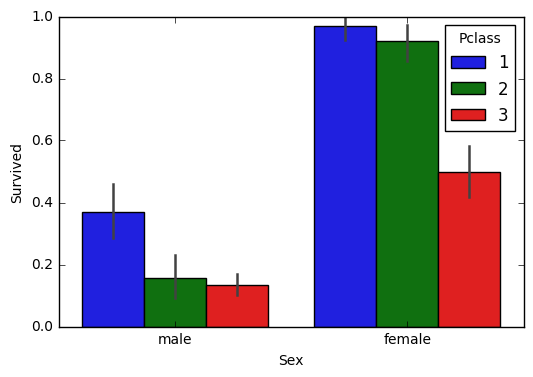

In [12]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=titanic);

### In the above plot we can see that survival rate of female was high as compared to men. Also one more important thing to note is that more females from upper class were saved i.e from first and second class and less from third class.

In [14]:
titanic.groupby(["Pclass", "Survived"]).size()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

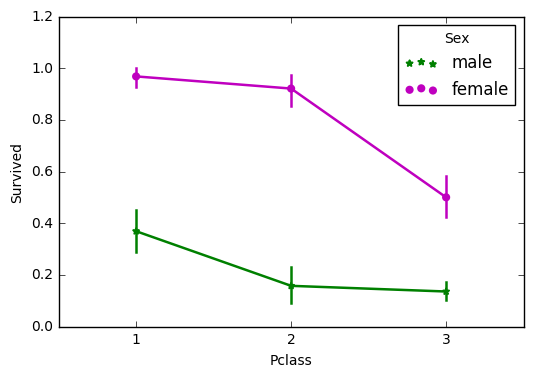

In [15]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["*", "o"], linestyles=["-", "-"]);

In [16]:
titanic.groupby(["Embarked", "Survived"]).size()

Embarked  Survived
C         0            75
          1            94
Q         0            47
          1            31
S         0           427
          1           217
dtype: int64

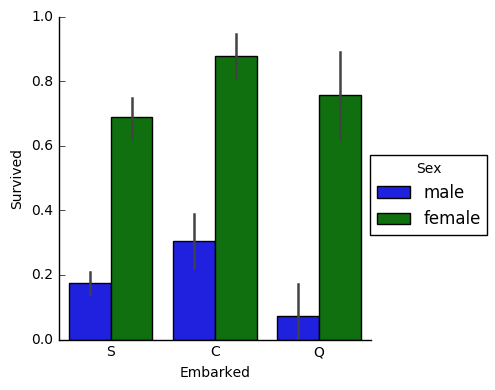

In [17]:
sns.factorplot(x="Embarked", y="Survived", hue="Sex", data=titanic, kind="bar");

### In above plot no. of survivors(male/female) that embarked fron point c(C = Cherbourg) had survivor count as compared to people who embarked from point s and Q (Q = Queenstown, S = Southampton).

In [33]:
#age data is distributed hence it can be analysed in 2 ways, one way is to visualise the whole data 
#and check manually the range of age in which more people survived. Second method is to write a function and divide people in 
#certain ranges and then visualise. 
def age_range(age):
     if age in range(0,20):
         return ('kids')
     elif age in range(20,45):
         return ('young')
     elif age in range(45,60):
         return ('mid_age')
     else:
         return ('old')

In [34]:
#make a new column and apply this age range function to it
new_col=titanic['Age'].apply(age_range)
new_col.head()

0    young
1    young
2    young
3    young
4    young
Name: Age, dtype: object

In [25]:
#new column that formed above is a panda series and we need a dataframe 
#so that we can merge it with our original data and visualise in a better way
age_label=pd.DataFrame({'index':new_col.index, 'age_label':new_col.values})
#new_col is a series, we need to convert it to dataframe for visualisation


In [26]:
age_label.head()

,age_label,index
0,young,0
1,young,1
2,young,2
3,young,3
4,young,4


In [35]:
titanic_clean = titanic.merge(age_label, how='outer', left_index=True, right_index=True)

In [36]:
titanic_clean.head() #see the age label column that has been merged

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_label,index
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C,S,young,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,young,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C,S,young,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,young,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C,S,young,4


In [29]:
#visualise the data as per age range
titanic_clean.groupby(["age_label", "Survived"]).size()

age_label  Survived
kids       0           112
           1            88
mid_age    0            71
           1            38
old        0            40
           1            20
young      0           326
           1           196
dtype: int64

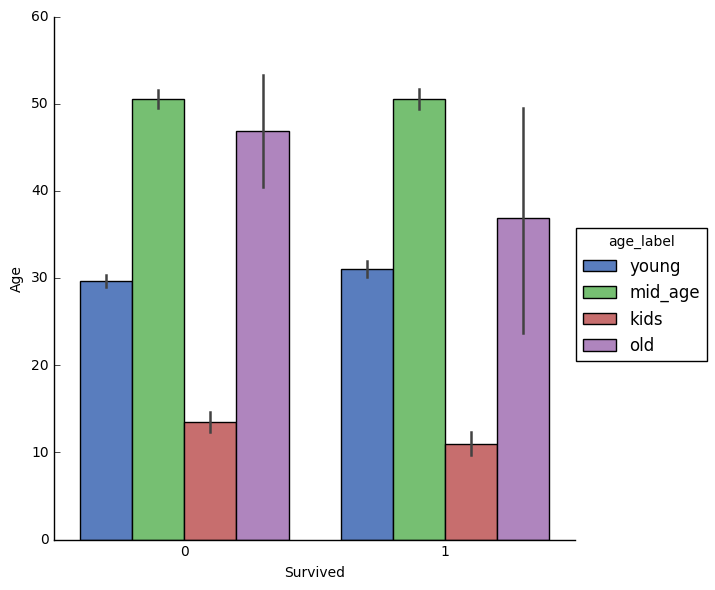

In [31]:
g = sns.factorplot(x="Survived", y="Age", hue="age_label", data=df_merged,
                   size=6, kind="bar", palette="muted")

### Above plot shows the age range of survivors and non survivors, no. of survivors and dead are almost equal in each age range except old (Above 60 years).Old people where more dead than survived.